<a href="https://colab.research.google.com/github/mohammedterry/NLP_for_ML/blob/master/Text_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import seaborn as sns
import pandas as pd

def display(ranked_wordlist, n_samples = 15):
  sns.barplot(x="frequency", y="words", data=pd.DataFrame({"frequency":[x for x,_ in ranked_wordlist[:n_samples]], "words":[x for _,x in ranked_wordlist[:n_samples]]}))
  
def compare(ranked_wordlist_a, ranked_wordlist_b, method_a = "a", method_b = "b", n_samples = 15):
  d_i = pd.DataFrame({
    "method":[method_a]*n_samples + [method_b]*n_samples,
    "frequency":[x for x,_ in ranked_wordlist_a[:n_samples]] + [x for x,_ in ranked_wordlist_b[:n_samples]],
    "words":[x for _,x in ranked_wordlist_a[:n_samples]] + [x for _,x in ranked_wordlist_b[:n_samples]], 
  })
  sns.factorplot("frequency", "words", col="method", data=d_i, kind="bar")

# Get some raw text

In [0]:
import requests
from bs4 import BeautifulSoup as bs

def scrape(url):
  soup = bs(requests.get(url, headers = {'user-agent': "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36",'referrer': 'https://google.com'}).text, "html.parser")
  return '\n'.join([dom.text for dom in soup.find_all(['title','h1','h2','h3','h4','h5','h6','p'])])

In [3]:
example_document = scrape("http://www.literatureproject.com/alice/alice_7.htm")

print(example_document[:300])

7 : CHAPTER VII


 
Prev 
| Next 
| Contents 
CHAPTER VII
A Mad Tea-Party
              

  There was a table set out under a tree in front of the house,
and the March Hare and the Hatter were having tea at it:  a
Dormouse was sitting between them, fast asleep, and the other two
were using it as a c


# Frequency of Terms

In [0]:
from collections import defaultdict

def rank_words(document):
  counter = defaultdict(int)
  for word in document.split():
      counter[word] += 1
  return sorted(zip(counter.values(), counter.keys()), reverse = True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


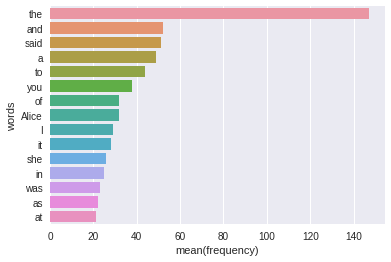

In [7]:
ranked_raw = rank_words(example_document)
display(ranked_raw)

# Strip Punctuation 

In [0]:
def clean(text):
  return ' '.join(''.join(letter if ord('a') <= ord(letter.lower()) <= ord('z') or letter.isdigit() else ' ' for letter in text).split())

In [10]:
clean_document = clean(example_document)
clean_document[:100]

'7 CHAPTER VII Prev Next Contents CHAPTER VII A Mad Tea Party There was a table set out under a tree '

# Lower Case

In [11]:
clean_document = clean_document.lower()
clean_document[:100]

'7 chapter vii prev next contents chapter vii a mad tea party there was a table set out under a tree '

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


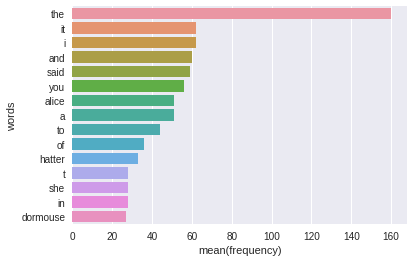

In [12]:
ranked_clean = rank_words(clean_document)
display(ranked_clean)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


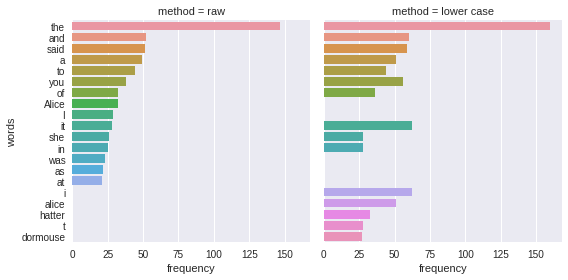

In [13]:
compare(ranked_raw,ranked_clean, "raw", "lower case")

# Split Strings

In [14]:
!pip3 install wordninja

    100% |████████████████████████████████| 542kB 24.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/c3/f8/19/c739a55c5967907864764fea6723ca5bf9dd435eed7b03cbfb
Successfully built wordninja


In [15]:
from wordninja import split

x = 'itwasadarkandstormynighttherainfellintorrentsexceptatoccasionalintervalswhenitwascheckedbyaviolentgustofwindwhichsweptupthestreetsforitisinlondonthatoursceneliesrattlingalongthehousetopsandfiercelyagitatingthescantyflameofthelampsthatstruggledagainstthedarkness'
' '.join(split(x))

'it was a dark and stormy night the rain fell in torrents except at occasional intervals when it was checked by a violent gust of wind which swept up the streets for it is in london that our scene lies rattling along the housetops and fiercely agitating the scanty flame of the lamps that struggled against the darkness'

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


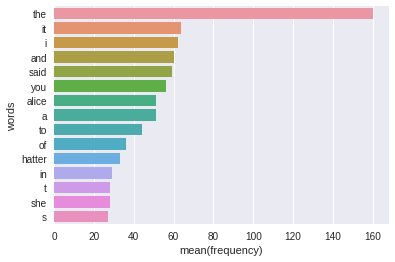

In [16]:
split_document = ' '.join(split(clean_document))
ranked_split = rank_words(split_document)
display(ranked_split)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


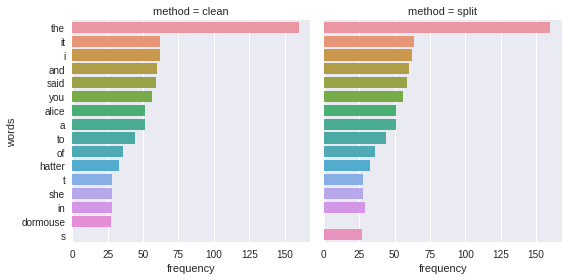

In [17]:
compare(ranked_clean, ranked_split, "clean", "split")

# Stop Words

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
from nltk.corpus import stopwords
stopWords = stopwords.words('english')
stopWords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


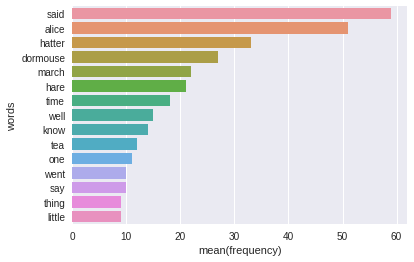

In [20]:
nostopwords_document = ' '.join([word for word in split_document.split() if word not in stopWords])
ranked_nostopwords = rank_words(nostopwords_document)
display(ranked_nostopwords)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


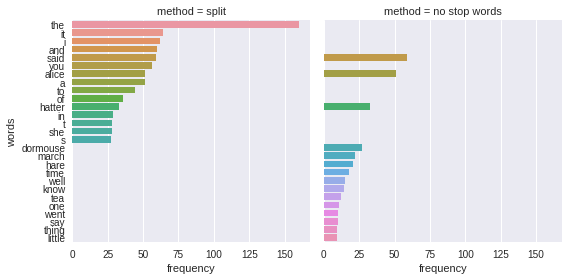

In [21]:
compare(ranked_split,ranked_nostopwords, "split", "no stop words")

# N Grams
phrases

In [22]:
list(nltk.bigrams("this is a test".split()))

[('this', 'is'), ('is', 'a'), ('a', 'test')]

In [23]:
list(nltk.trigrams("this is a test".split()))

[('this', 'is', 'a'), ('is', 'a', 'test')]

In [0]:
from collections import defaultdict
import nltk

def rank_ngrams(document, unigrams = True, bigrams = True, trigrams = True):
  counter = defaultdict(int)
  if unigrams:
    for word in document.split():
        counter[word] += 1
  if bigrams:
    for bigram in nltk.bigrams(document.split()):
      counter[' '.join(bigram)] += 1
  if trigrams:
    for trigram in nltk.trigrams(document.split()):
      counter[' '.join(trigram)] += 1
  return sorted(zip(counter.values(), counter.keys()), reverse = True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


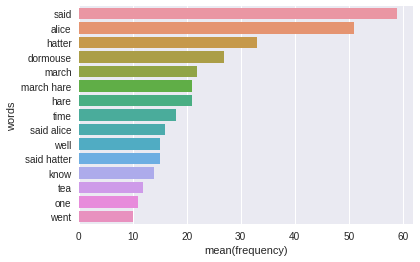

In [25]:
ranked_ngrams = rank_ngrams(nostopwords_document)
display(ranked_ngrams)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


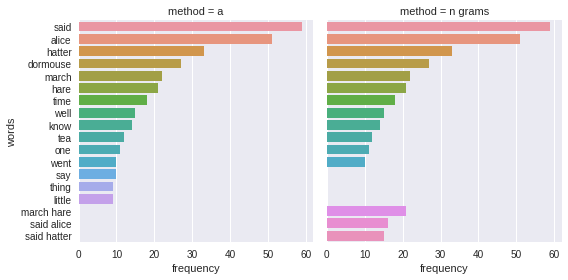

In [26]:
compare(ranked_nostopwords, ranked_ngrams, method_b = "n grams")

# Stemming
chopping off suffixes

In [27]:
import nltk
nltk.download('rslp')

from nltk.stem.api import StemmerI
from nltk.stem.regexp import RegexpStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.isri import ISRIStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.rslp import RSLPStemmer

stemmer_sb = SnowballStemmer("english")
stemmer_p = PorterStemmer()
stemmer_l = LancasterStemmer()
stemmer_regex = RegexpStemmer('ing$|s$|e$|able$|ed$|en$',min=4)
stemmer_isri = ISRIStemmer()
stemmer_rslp = RSLPStemmer()

def get_name(model):
  name = clean(str(model).split()[0])
  name = ''.join([c + ' ' if d.isupper() and e.islower() else c for c,d,e in zip(name,name[1:] + '..',name[2:] + '..')])
  return ' '.join(name.split())
  
def test_stemmers(Xs, Ys, stemmers = [stemmer_sb, stemmer_p, stemmer_l, stemmer_isri, stemmer_rslp, stemmer_regex]):
  results = {"expected":Ys}
  for stemmer in stemmers:
    results[get_name(stemmer)] = [stemmer.stem(x.lower()) for x in Xs]
  for model,words in results.items():
    results[model].append(sum([w1.lower() == w2.lower() for w1,w2 in zip(results['expected'],words)]))  

  import pandas as pd
  df = pd.DataFrame(results)
  df.set_index("expected", inplace = True) 
  return df

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [28]:
example_sentence = "Sitting while eating leaves one wondering and then googling"
expected_sentence = "Sit while eat leave one wonder and then google"
test_stemmers(example_sentence.split(), expected_sentence.split() )

,Lancaster Stemmer,Porter Stemmer,Regexp Stemmer,nltk stem isri ISRI Stemmer,nltk stem rslp RSLP Stemmer,nltk stem snowball Snowball Stemmer
expected,,,,,,
Sit,sit,sit,sitt,sitting,sitting,sit
while,whil,while,whil,while,whil,while
eat,eat,eat,eat,eating,eating,eat
leave,leav,leav,leave,leaves,leav,leav
one,on,one,one,one,one,one
wonder,wond,wonder,wonder,wondering,wondering,wonder
and,and,and,and,and,and,and
then,then,then,th,then,then,then
google,googl,googl,googl,googling,googling,googl


# Lemmatising
getting to the root of the word

In [29]:
nltk.download('wordnet')

from nltk.stem.wordnet import WordNetLemmatizer 
from spacy.lemmatizer import Lemmatizer 

wn_lemmatiser = WordNetLemmatizer()
sp_lemmatiser = Lemmatizer()

def test_lemmatisers(Xs, Ys):
  lemmatiser_results = {
      "expected":Ys,
      "NLTK":[wn_lemmatiser.lemmatize(x.lower(),'v') for x in Xs],
      "Spacy":[sp_lemmatiser(x.lower(), 'VERB')[0] for x in Xs],    
  }

  for lemmatiser,words in lemmatiser_results.items():
    lemmatiser_results[lemmatiser].append(sum([w1.lower() == w2.lower() for w1,w2 in zip(lemmatiser_results['expected'],words)]))  

  import pandas as pd
  lemma_df = pd.DataFrame(lemmatiser_results)
  lemma_df.set_index("expected", inplace = True) 
  return lemma_df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [30]:
example_sentence = "Sitting while eating leaves one wondering and then googling"
expected_sentence = "Sit while eat leave one wonder and then google"
test_lemmatisers(example_sentence.split(), expected_sentence.split())

,NLTK,Spacy
expected,,
Sit,sit,sitting
while,while,while
eat,eat,eating
leave,leave,leaves
one,one,one
wonder,wonder,wondering
and,and,and
then,then,then
google,google,googling


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


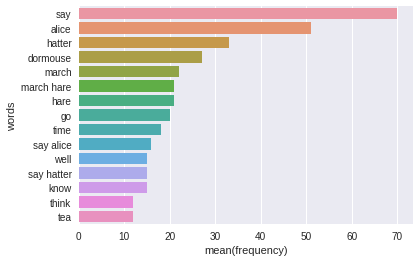

In [31]:
lemmatised_document = ' '.join([wn_lemmatiser.lemmatize(word,'v') for word in nostopwords_document.split()])
ranked_lemma = rank_ngrams(lemmatised_document)
display(ranked_lemma)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


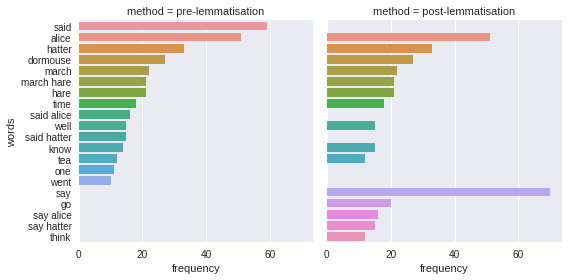

In [32]:
compare(ranked_ngrams, ranked_lemma,'pre-lemmatisation', 'post-lemmatisation')

# Tf-Idf (Sklearn)
giving more weight to words uncommon to this context

In [0]:
alice_wonderland_12chapters = [scrape(f"http://www.literatureproject.com/alice/alice_{i}.htm") for i in range(1,13)]

In [0]:
alice_wonderland_12chapters[6][:100]

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

def rank_tfidf(document, tfidf):
  feature_names = tfidf.get_feature_names()
  response = tfidf.transform([document])
  tfs = {feature_names[col] : response[0, col]  for col in response.nonzero()[1]}
  return sorted(zip(tfs.values(), tfs.keys()), reverse = True)

tfidf = TfidfVectorizer(stop_words = 'english', ngram_range = (1,3))
tfidf.fit_transform(alice_wonderland_12chapters)

In [0]:
ranked_tfidf = rank_tfidf(example_document, tfidf)
display(ranked_tfidf)

In [0]:
max_freq = max(ranked_ngrams)[0] * 3
scaled_tfidf = [(freq*max_freq,word) for freq,word in ranked_tfidf]
compare(ranked_ngrams, scaled_tfidf, "pre-tfidf", "post-tfidf")

# Montezuma Ranking (Gensim)

In [0]:
from gensim.summarization import keywords
ranked_gensim = [(f,w) for w,f in keywords(example_document,scores=True)]

In [0]:
display(ranked_gensim)

In [0]:
from gensim.summarization import mz_keywords
ranked_montezuma = [(f,w) for w,f in mz_keywords(example_document,scores=True, weighted=False)]

In [0]:
display(ranked_montezuma)

In [0]:
compare(ranked_gensim, ranked_mz)

# Document Topic Modelling (DTM - Gensim)

In [5]:
from gensim import corpora

class DTMcorpus(corpora.textcorpus.TextCorpus):
    def get_texts(self):
        return self.input
    def __len__(self):
        return len(self.input)

!git clone https://github.com/magsilva/dtm

Cloning into 'dtm'...
remote: Enumerating objects: 807, done.
remote: Total 807 (delta 0), reused 0 (delta 0), pack-reused 807
Receiving objects: 100% (807/807), 8.45 MiB | 9.52 MiB/s, done.
Resolving deltas: 100% (312/312), done.


In [0]:
corpus = DTMcorpus([lemmatised_document.split()])

In [0]:
from gensim.models.wrappers.dtmmodel import DtmModel
dtm_path = 'dtm/bin/dtm-linux64'
time_seq = [1]
dtm = DtmModel(dtm_path, corpus, time_seq, num_topics=1, id2word=corpus.dictionary, initialize_lda=True)

In [0]:
ranked_dtm = dtm.show_topic(topicid=0, time=0, topn=30)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


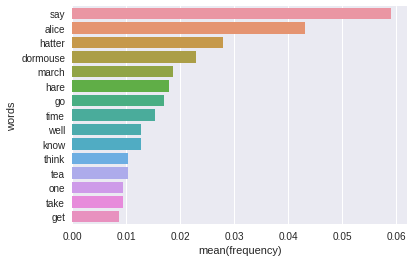

In [49]:
display(ranked_dtm)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


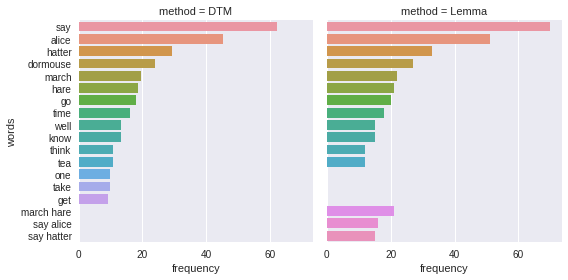

In [58]:
max_freq = max(ranked_lemma)[0] * 15
scaled_dtm = [(freq*max_freq,word) for freq,word in ranked_dtm]
compare(scaled_dtm, ranked_lemma,'DTM', 'Lemma')

# Fuzzy String Matching
useful for typos

# Word Vectors
useful for capturing meaning